## Google Play Store: Application Trend Prediction

I am learning about React Native. I want to create an application then public it on Google Play Store. However, I don't want to create an useless application. That's why I need to dig deep inside the dataset of Google Play Store to find out which application type is the trend now.

### 1. Analytic the dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import re

app_data = pd.read_csv('googleplaystore.csv')
review_data = pd.read_csv('googleplaystore_user_reviews.csv', encoding='latin-1')

Check the detail of both datasets to get the column details

In [2]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Because the number of items in each field are not the same, so we have to remove the empty rows with "nan" and 0

In [3]:
app_data['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [4]:
app_data['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [5]:
app_data['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

In [6]:
app_data['Current Ver'].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.0.612928', '0.3.4', '2.0.148.0'],
      dtype=object)

In [7]:
app_data['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [8]:
app_data.dropna(inplace=True)
app_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
App               9360 non-null object
Category          9360 non-null object
Rating            9360 non-null float64
Reviews           9360 non-null object
Size              9360 non-null object
Installs          9360 non-null object
Type              9360 non-null object
Price             9360 non-null object
Content Rating    9360 non-null object
Genres            9360 non-null object
Last Updated      9360 non-null object
Current Ver       9360 non-null object
Android Ver       9360 non-null object
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


Now we are looking on "Rating" to see how the user rates an application, and find the factor that impact the rating.

In [9]:
app_data['Rating'].describe()

count    9360.000000
mean        4.191838
std         0.515263
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

Wow, once user rates a number, it is between 4 and 4.5. So does the app that is downloaded a lot have a great "Rating" and have a lot of "Reviews"?

In [10]:
app_data['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

The value is a string, so we need to convert it to a number

In [11]:
app_data['Installs'] = app_data['Installs'].apply(lambda x: int(re.sub(',|\+','', x)))
app_data['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,        100,        500,
               10,          5,         50,          1])

In [12]:
app_data['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [13]:
app_data['Reviews'] = app_data['Reviews'].apply(lambda x: int(x))
app_data['Reviews'].unique()

array([   159,    967,  87510, ...,    603,   1195, 398307])

In [14]:
app_data['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [15]:
app_data['Price'] = app_data['Price'].apply(lambda x: float(re.sub('\$','', x)))
app_data['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   7.99,   5.99,   2.99,   3.49,
         1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,  24.99,
        11.99,  79.99,  16.99,  14.99,  29.99,  12.99,   2.49,  10.99,
         1.5 ,  19.99,  15.99,  33.99,  39.99,   3.95,   4.49,   1.7 ,
         8.99,   1.49,   3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,
         4.84,   4.77,   1.61,   2.5 ,   1.59,   6.49,   1.29, 299.99,
       379.99,  37.99,  18.99, 389.99,   8.49,   1.75,  14.  ,   2.  ,
         3.08,   2.59,  19.4 ,   3.9 ,   4.59,  15.46,   3.04,  13.99,
         4.29,   3.28,   4.6 ,   1.  ,   2.95,   2.9 ,   1.97,   2.56,
         1.2 ])

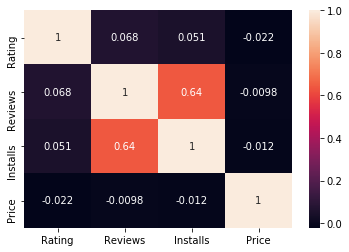

In [16]:
sns.heatmap(app_data.corr(), annot=True)

With this chart, we can see high "Installs" will have high "Reviews", then high "Rating". So which "Category" will have high "Installs"?

In [17]:
app_data.sort_values(by=['Installs']).tail(20)["Category"].unique()

array(['FAMILY', 'PHOTOGRAPHY', 'ENTERTAINMENT', 'GAME', 'COMMUNICATION',
       'NEWS_AND_MAGAZINES', 'TRAVEL_AND_LOCAL', 'PRODUCTIVITY', 'SOCIAL'],
      dtype=object)

In [18]:
app_data.sort_values(by=['Installs']).tail(20)["App"].unique()

array(['Google Play Games', 'Google Photos', 'Subway Surfers',
       'Messenger – Text and Video Chat for Free', 'Google News',
       'Maps - Navigate & Explore', 'Google Drive', 'Gmail',
       'Google Street View', 'Google Chrome: Fast & Secure', 'Hangouts',
       'Instagram', 'WhatsApp Messenger'], dtype=object)

In [19]:
app_data.sort_values(by=['Installs']).tail(20)["Type"].unique()

array(['Free'], dtype=object)

People usually install and use Google products, some is come from Facebook. They care about 'PHOTOGRAPHY', 'ENTERTAINMENT', 'GAME', 'COMMUNICATION, 'SOCIAL' ... Both of them are "Free"

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text xticklabel objects>)

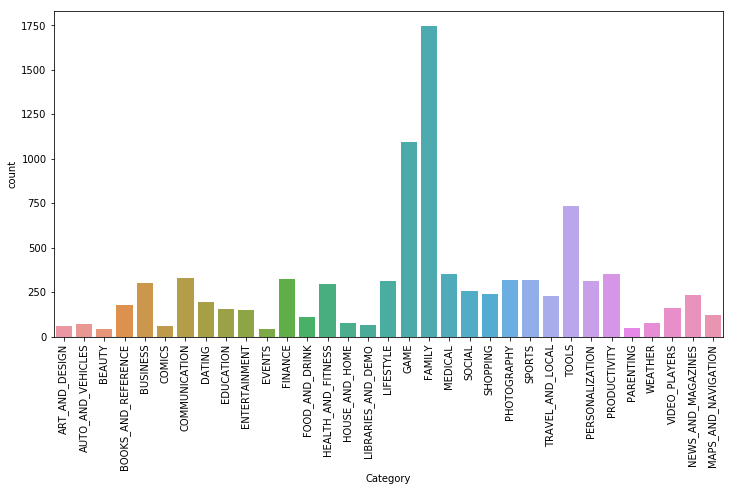

In [20]:
plt.figure(figsize=(12,6))
sns.countplot(x="Category", data=app_data)
plt.xticks(rotation=90)

It's hard to compete with Google or Facebook, and there is a lot of applications in "Family" and "Game".

Let take a look at Paid applications

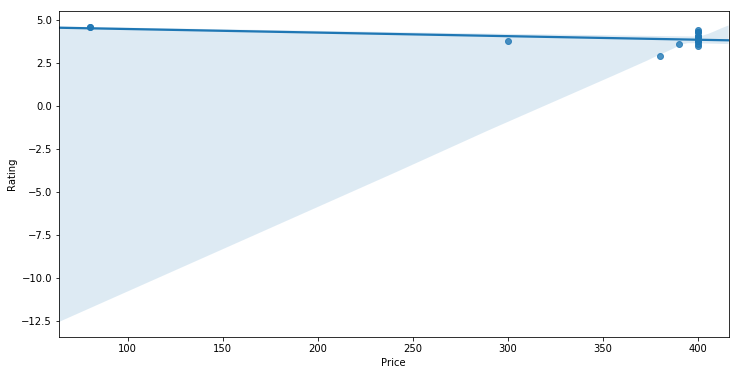

In [21]:
plt.figure(figsize=(12,6))
sns.regplot(x="Price", y="Rating", data=app_data[app_data["Price"] > 50]);

Expensive applications will have good "Rating"

# Conclusion

1. Well-known applications will have a huge fan with reviews and rating.
2. High download will have high reviews, then high rating.
3. Once rating, user will give high rating.
4. Expansive applications will have good download, reviews and rating.

=> Want to create an application, create an application in NEWS_AND_MAGAZINES, TRAVEL_AND_LOCAL or SOCIAL with a high price :D

### 2. User 's previews prediction

In [22]:
review_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
App                       64295 non-null object
Translated_Review         37427 non-null object
Sentiment                 37432 non-null object
Sentiment_Polarity        37432 non-null float64
Sentiment_Subjectivity    37432 non-null float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [23]:
review_data.dropna(inplace=True)
review_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
App                       37427 non-null object
Translated_Review         37427 non-null object
Sentiment                 37427 non-null object
Sentiment_Polarity        37427 non-null float64
Sentiment_Subjectivity    37427 non-null float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


In [38]:
from collections import Counter
vocab = Counter()
for row in review_data['Translated_Review']:
    for word in row.strip().lower().split():
        vocab[word] += 1
word_data = pd.DataFrame.from_dict(vocab, orient='index').reset_index()
word_data.head(10)

,index,0
0,i,33347
1,like,5328
2,eat,124
3,delicious,9
4,food.,30
5,that's,570
6,i'm,2482
7,cooking,55
8,food,452
9,"myself,",10


In [39]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/haotran/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [44]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

word_data = word_data[~word_data['index'].isin(stop)]

stop = stop + ['eat', 'food', 'foods','cooking', 'myself', 'case', 'also','eating','especially','slc']

In [45]:
word_data['index'].head(20)

1          like
2           eat
3     delicious
4         food.
5        that's
6           i'm
7       cooking
8          food
9       myself,
10         case
11          "10
12         best
13       foods"
14        helps
15         lot,
16         also
17        "best
19       (shelf
20       life)"
22         help
Name: index, dtype: object

In [46]:
y = review_data['Sentiment']
X = review_data['Translated_Review']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [47]:
def preprocessor(text):
    # Remove HTML markup
    text = re.sub('<[^>]*>', '', text)
    # Save emoticons for later appending
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    # Remove any non-word character and append the emoticons,
    # removing the nose character for standarization. Convert to lower case
    text = (re.sub('[\W]+', ' ', text.lower()) + ' ' + ' '.join(emoticons).replace('-', ''))
    
    return text

In [48]:
from nltk.stem import PorterStemmer
porter = PorterStemmer()
def tokenizer(text):
    return text.strip().lower().split();

def tokenizer_porter(text):
    words = tokenizer(text);
    return [porter.stem(word) for word in words]

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words=stop,
                        tokenizer=tokenizer_porter,
                        preprocessor=preprocessor)

clf = Pipeline([('vect', tfidf),
                ('clf', LogisticRegression(random_state=0))])
clf.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2',
        preprocessor=<function preproc...nalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

Accuracy: 0.8876569596580283
             precision    recall  f1-score   support

   Negative       0.88      0.77      0.82      1668
    Neutral       0.87      0.74      0.80       999
   Positive       0.89      0.96      0.92      4819

avg / total       0.89      0.89      0.88      7486



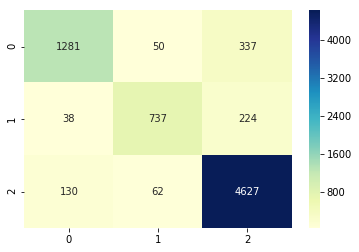

In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

clf.fit(X_train, y_train) 

predictions = clf.predict(X_test)

print ('Accuracy:', accuracy_score(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")
print(classification_report(y_test, predictions))

In [32]:
twits = [
    "Waste time",
    "Good",
    "Best",
]

preds = clf.predict_proba(twits)

for i in range(len(twits)):
    print(f'{twits[i]} --> Negative, Neutral, Positive = {preds[i]}')

Waste time --> Negative, Neutral, Positive = [0.90563911 0.03048024 0.06388065]
Good --> Negative, Neutral, Positive = [3.36422087e-05 3.77915278e-05 9.99928566e-01]
Best --> Negative, Neutral, Positive = [5.32507258e-05 1.08631155e-03 9.98860438e-01]
